# Анализируем идеальные примеры

In [51]:
import torch
from datasets import load_dataset
import transformers as ts
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import pos_tag, word_tokenize
from tqdm import tqdm
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Распаковываем датасеты

In [2]:
tokenizer = ts.AutoTokenizer.from_pretrained('roberta-base', cache_dir=f"cache/tokenizer/roberta-base")

In [3]:
mnli = load_dataset('multi_nli', cache_dir='cache/data')['train']
mnli[0]

Using custom data configuration default
Reusing dataset multi_nli (cache/data/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39)


  0%|          | 0/3 [00:00<?, ?it/s]

{'promptID': 31193,
 'pairID': '31193n',
 'premise': 'Conceptually cream skimming has two basic dimensions - product and geography.',
 'premise_binary_parse': '( ( Conceptually ( cream skimming ) ) ( ( has ( ( ( two ( basic dimensions ) ) - ) ( ( product and ) geography ) ) ) . ) )',
 'premise_parse': '(ROOT (S (NP (JJ Conceptually) (NN cream) (NN skimming)) (VP (VBZ has) (NP (NP (CD two) (JJ basic) (NNS dimensions)) (: -) (NP (NN product) (CC and) (NN geography)))) (. .)))',
 'hypothesis': 'Product and geography are what make cream skimming work. ',
 'hypothesis_binary_parse': '( ( ( Product and ) geography ) ( ( are ( what ( make ( cream ( skimming work ) ) ) ) ) . ) )',
 'hypothesis_parse': '(ROOT (S (NP (NN Product) (CC and) (NN geography)) (VP (VBP are) (SBAR (WHNP (WP what)) (S (VP (VBP make) (NP (NP (NN cream)) (VP (VBG skimming) (NP (NN work)))))))) (. .)))',
 'genre': 'government',
 'label': 1}

In [4]:
samples = torch.load('mnli_42/multi_nli_train_sample_25')

## Определяем, какие строчки из исходного датасета участвуют в идеальных примерах

In [5]:
p, h = [], []
for row in samples:
    text = tokenizer.decode(row['input_ids'])
    text = text[3:-4]  # Removing <s> and </s>
    premise, hypothesis = text.split(tokenizer.sep_token)
    p.append(premise)
    h.append(hypothesis)

In [6]:
idx = []
for i in tqdm(range(len(mnli))):
    if mnli[i]['premise'] in p and mnli[i]['hypothesis'] in h:
        idx.append(i)
print(len(idx))

100%|██████████| 392702/392702 [00:37<00:00, 10531.58it/s]

29


In [7]:
samples = mnli.select(idx)
mnli = mnli.select(range(100000))

## Cмотрим на распределение лэйблов

(array([11.,  9.,  9.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

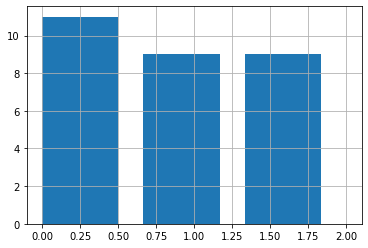

In [8]:
plt.grid()
plt.hist([row['label'] for row in samples], bins=3, width=0.5)

(array([33803., 31057., 35140.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

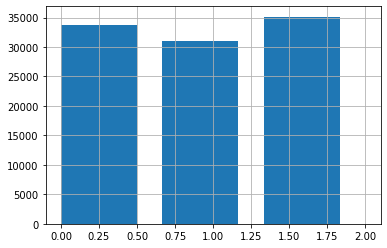

In [9]:
plt.grid()
plt.hist([row['label'] for row in mnli], bins=3, width=0.5)

## Смотрим на распределение длины токенов

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

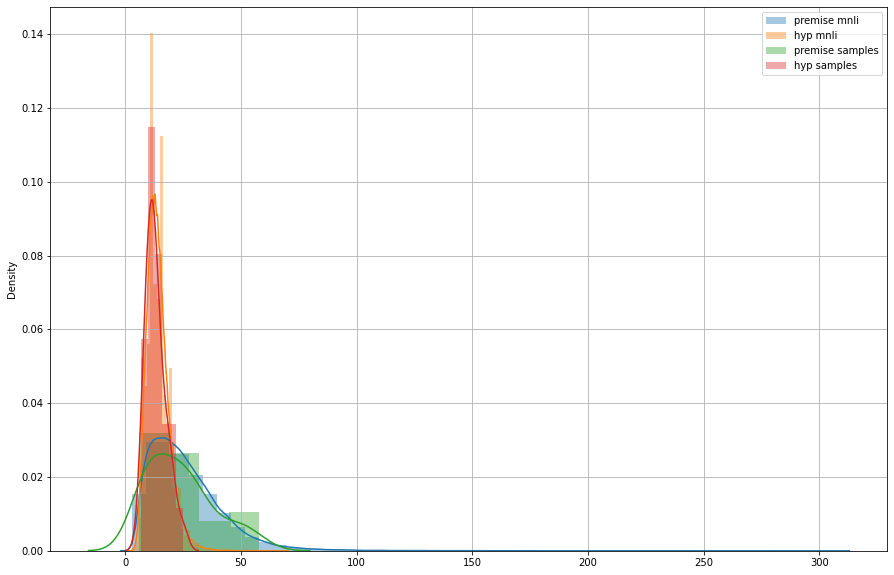

In [55]:
plt.figure(figsize=(15, 10))
sns.distplot([len(tokenizer.encode(row['premise'])) for row in mnli], label='premise mnli')
sns.distplot([len(tokenizer.encode(row['hypothesis'])) for row in mnli], label='hyp mnli')
sns.distplot([len(tokenizer.encode(row['premise'])) for row in samples], label='premise samples')
sns.distplot([len(tokenizer.encode(row['hypothesis'])) for row in samples], label='hyp samples')
plt.grid()
plt.legend()

## Смотрим на длину предложения в символах

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

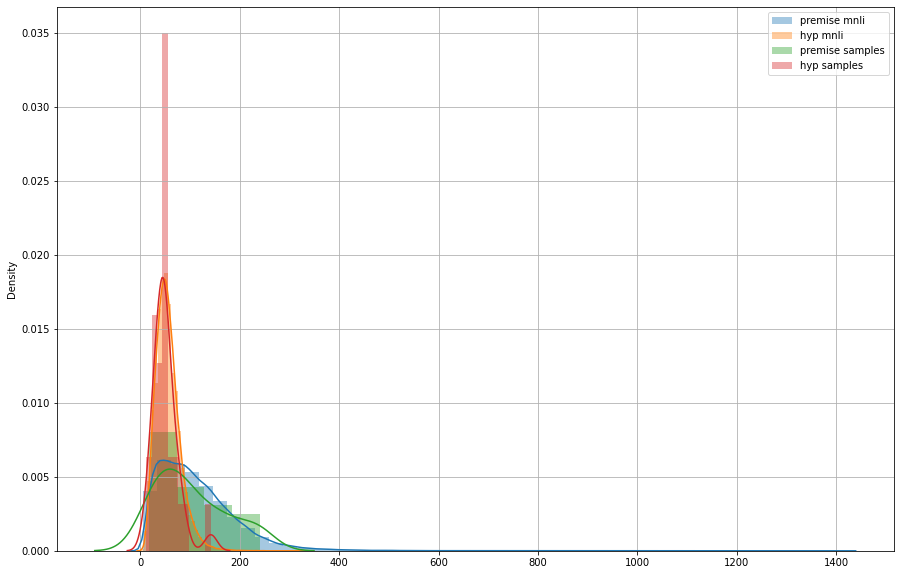

In [54]:
plt.figure(figsize=(15, 10))
sns.distplot([len(row['premise']) for row in mnli], label='premise mnli')
sns.distplot([len(row['hypothesis']) for row in mnli], label='hyp mnli')
sns.distplot([len(row['premise']) for row in samples], label='premise samples')
sns.distplot([len(row['hypothesis']) for row in samples], label='hyp samples')
plt.legend()
plt.grid()
plt.show()

## Смотрим на длину предложения в словах

In [56]:
plt.figure(figsize=(15, 10))
sns.distplot([len(word_tokenize(row['premise'])) for row in anli], label='premise mnli')
sns.distplot([len(word_tokenize(row['hypothesis'])) for row in anli], label='hyp mnli')
sns.distplot([len(word_tokenize(row['premise'])) for row in samples], label='premise samples')
sns.distplot([len(word_tokenize(row['hypothesis'])) for row in samples], label='hyp samples')
plt.legend()
plt.grid()

NameError: name 'anli' is not defined

<Figure size 1080x720 with 0 Axes>

## Смотрим на жанры (только для MNLI)

In [30]:
d = {}
for row in samples:
    d[row['genre']] = d.get(row['genre'], 0) + 1
print(d)


{'telephone': 9, 'travel': 7, 'fiction': 5, 'slate': 7, 'government': 1}


In [31]:
d = {}
for row in mnli:
    d[row['genre']] = d.get(row['genre'], 0) + 1
print(d)


{'government': 20002, 'telephone': 21025, 'fiction': 20170, 'travel': 19251, 'slate': 19552}


In [48]:
tmnli = load_dataset('multi_nli')['validation_matched']

Using custom data configuration default
Reusing dataset multi_nli (/home/jovyan/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39)


  0%|          | 0/3 [00:00<?, ?it/s]

In [49]:
d = {}
for row in tmnli:
    d[row['genre']] = d.get(row['genre'], 0) + 1
print(d)

{'slate': 1955, 'government': 1945, 'telephone': 1966, 'travel': 1976, 'fiction': 1973}


## Выделяем части речи

In [32]:
pos_tag(word_tokenize('I walked with a beautiful girl gracefully'))

[('I', 'PRP'),
 ('walked', 'VBD'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('girl', 'NN'),
 ('gracefully', 'RB')]

In [33]:
def get_tag(tag):
    if tag in ['JJ', 'DT', 'PRP']: # Adjective Noun Article Preposition
        return tag
    if tag.startswith('NN'):  # Noun
        return 'NN'
    if tag.startswith('VB'):  # Verb with variations
        return 'VB'
    return None

In [34]:
premise_tags = []
hypothesis_tags = []

for row in tqdm(samples):
    tags = pos_tag(word_tokenize(row['premise']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    premise_tags.append(d)
    
    tags = pos_tag(word_tokenize(row['hypothesis']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    hypothesis_tags.append(d)


100%|██████████| 29/29 [00:00<00:00, 538.40it/s]


In [35]:
all_p_tags = []
all_h_tags = []

for row in tqdm(mnli):
    tags = pos_tag(word_tokenize(row['premise']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    all_p_tags.append(d)
    
    tags = pos_tag(word_tokenize(row['hypothesis']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    all_h_tags.append(d)


100%|██████████| 100000/100000 [02:46<00:00, 600.65it/s]


## Смотрим на распределение частей речи

In [36]:
print(set(tags.get('DT', 0) for tags in premise_tags))
print(set(tags.get('NN', 0) for tags in premise_tags))
print(set(tags.get('JJ', 0) for tags in premise_tags))
print(set(tags.get('PRP', 0) for tags in premise_tags))
print(set(tags.get('VB', 0) for tags in premise_tags))


{0, 1, 2, 3, 4, 7}
{0, 1, 2, 3, 5, 6, 7, 9, 10, 13, 16}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, 5, 6, 7, 10, 13}


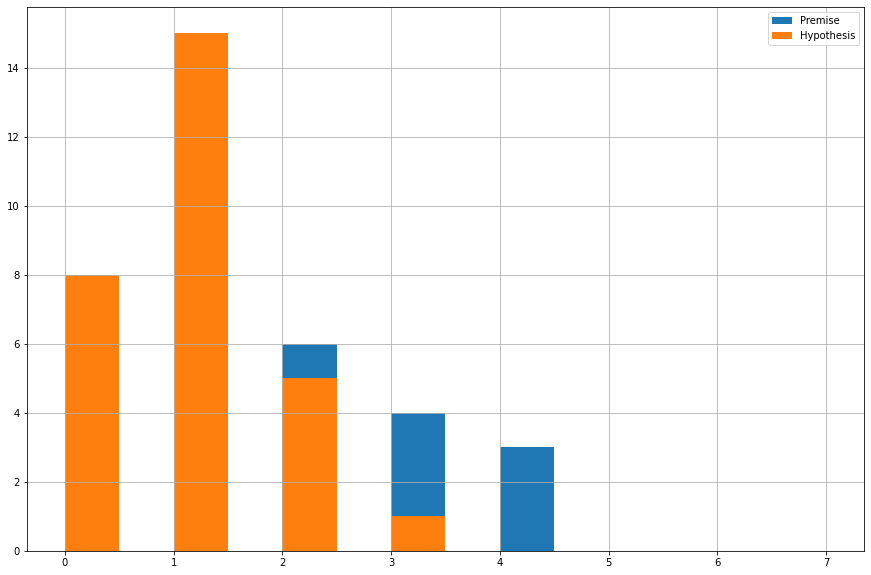

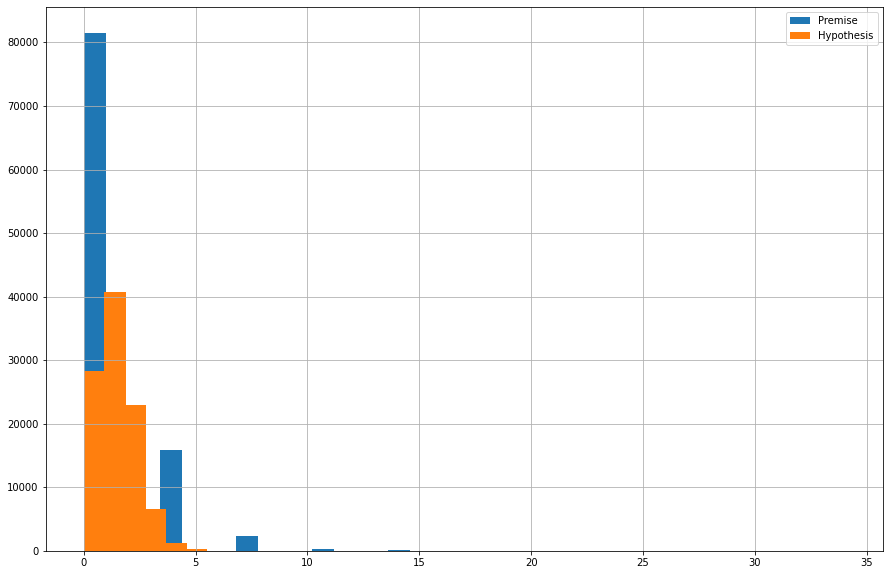

In [37]:
def plot_for_pos(pos):
    plt.figure(figsize=(15, 10))
    plt.hist([tags.get(pos, 0) for tags in premise_tags], bins=sorted(tags.get(pos, 0) for tags in premise_tags), width=0.5, label='Premise')
    plt.hist([tags.get(pos, 0) for tags in hypothesis_tags], bins=sorted(tags.get(pos, 0) for tags in premise_tags), width=0.5, label='Hypothesis')
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(15, 10))
    plt.hist([tags.get(pos, 0) for tags in all_p_tags], width=1, label='Premise')
    plt.hist([tags.get(pos, 0) for tags in all_h_tags], width=1, label='Hypothesis')
    plt.legend()
    plt.grid()
    plt.show()
plot_for_pos('DT')


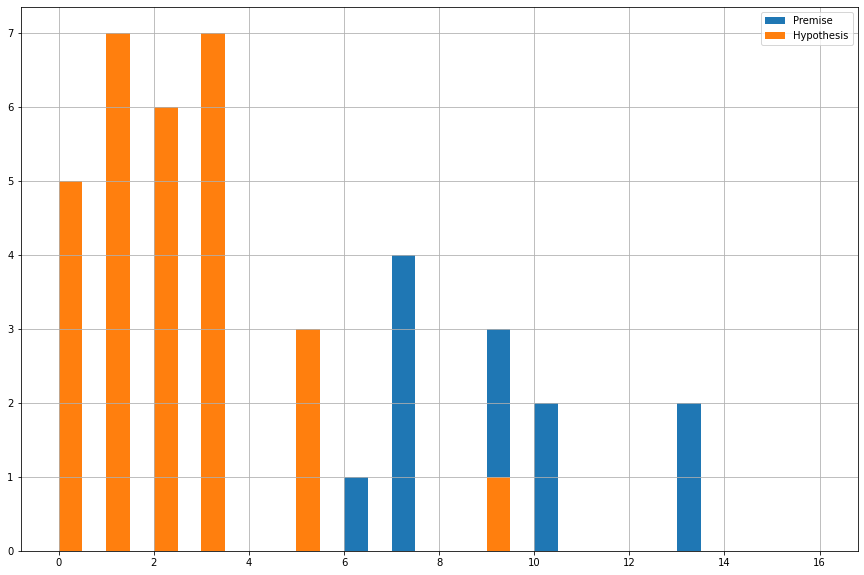

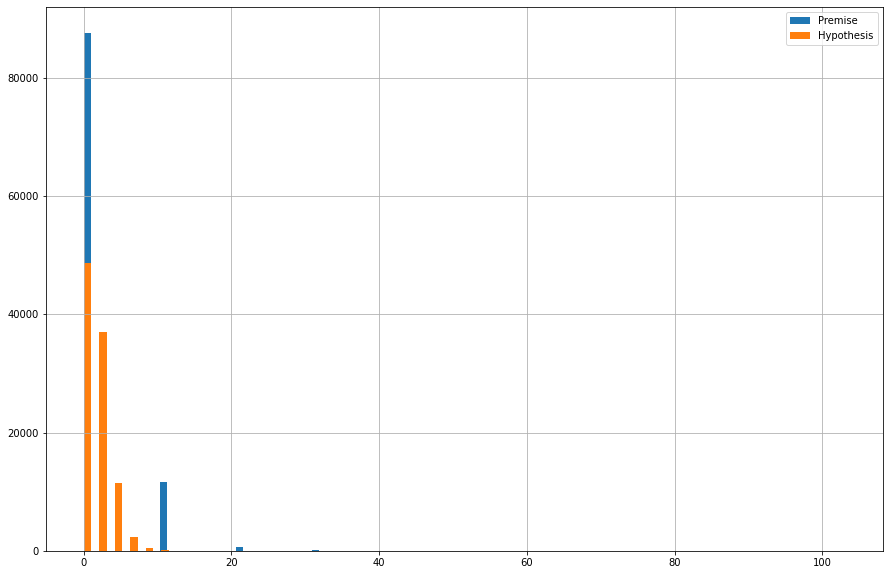

In [38]:
plot_for_pos('NN')


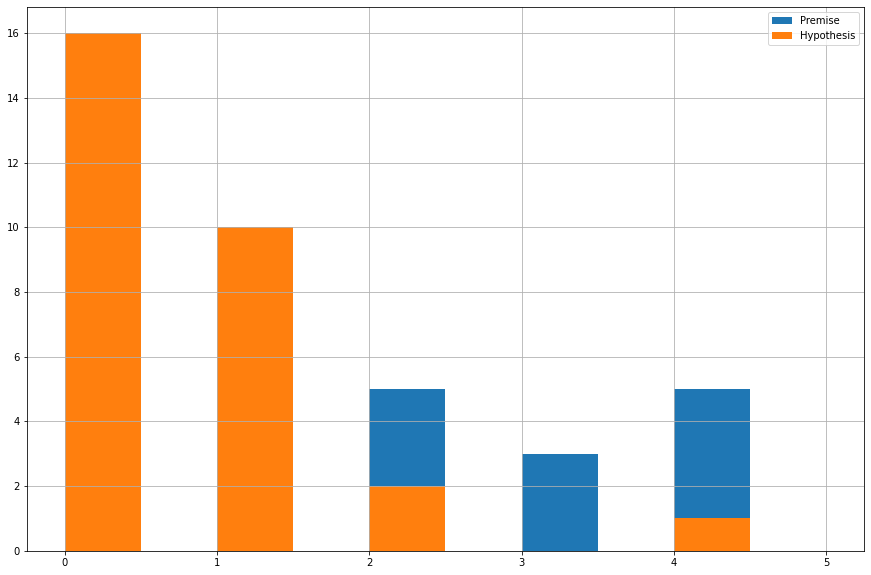

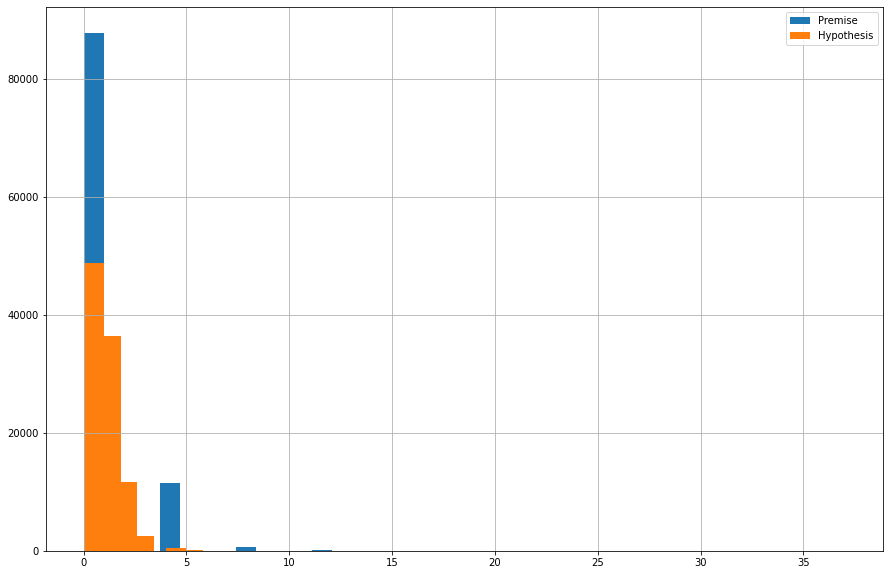

In [39]:
plot_for_pos('JJ')
 

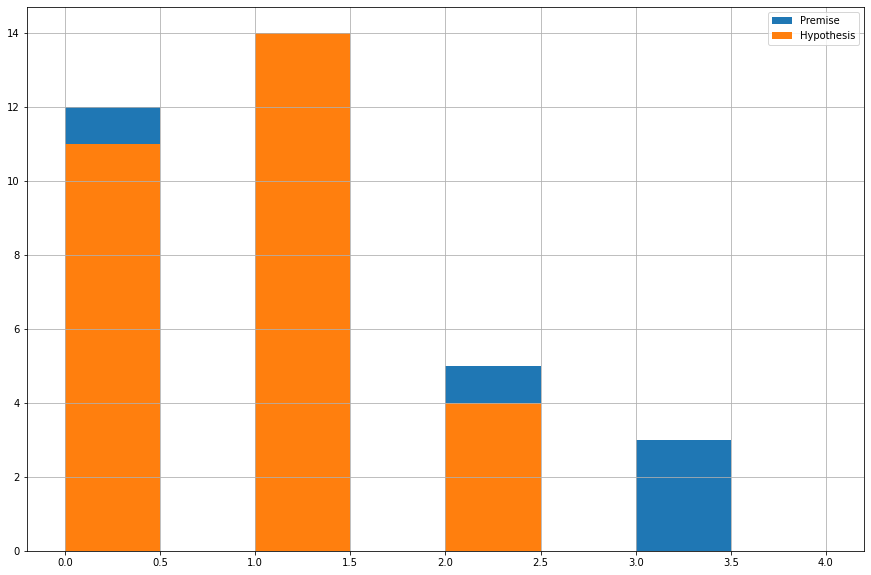

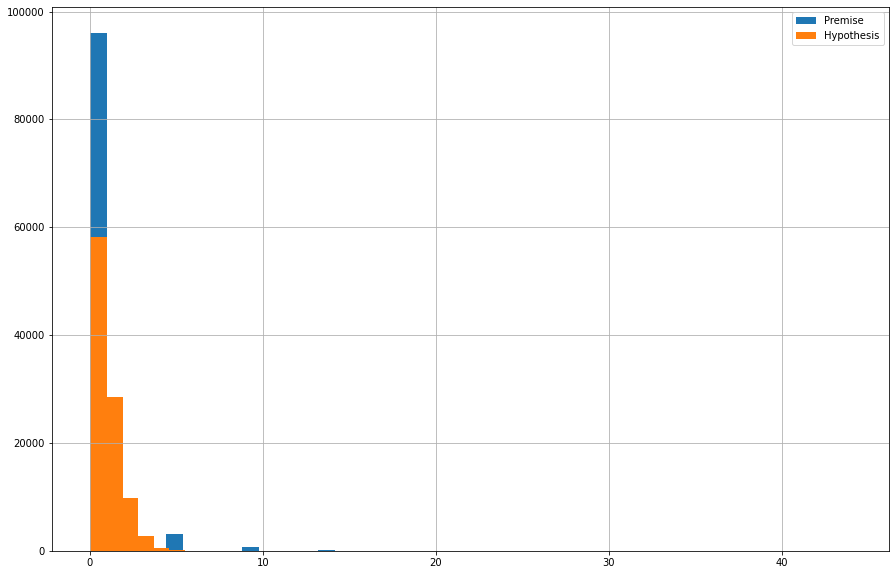

In [40]:
plot_for_pos('PRP')


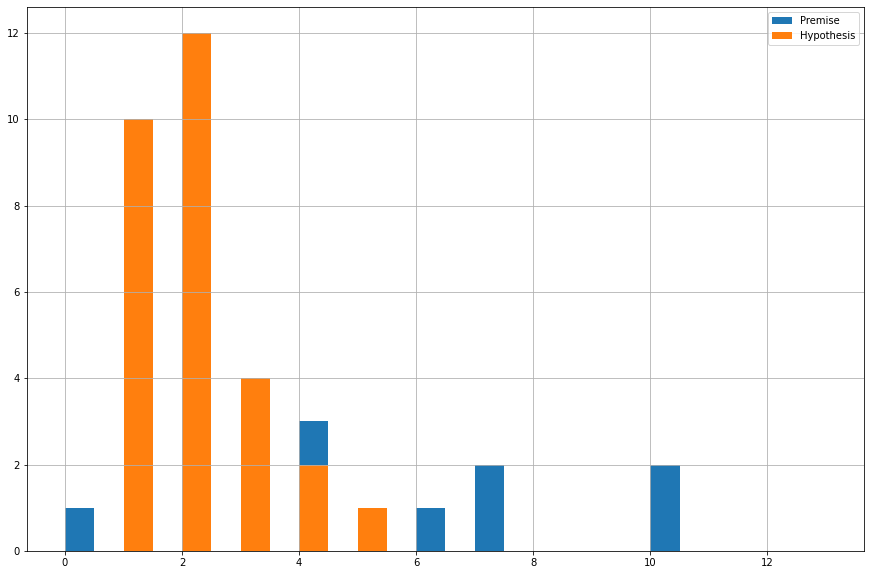

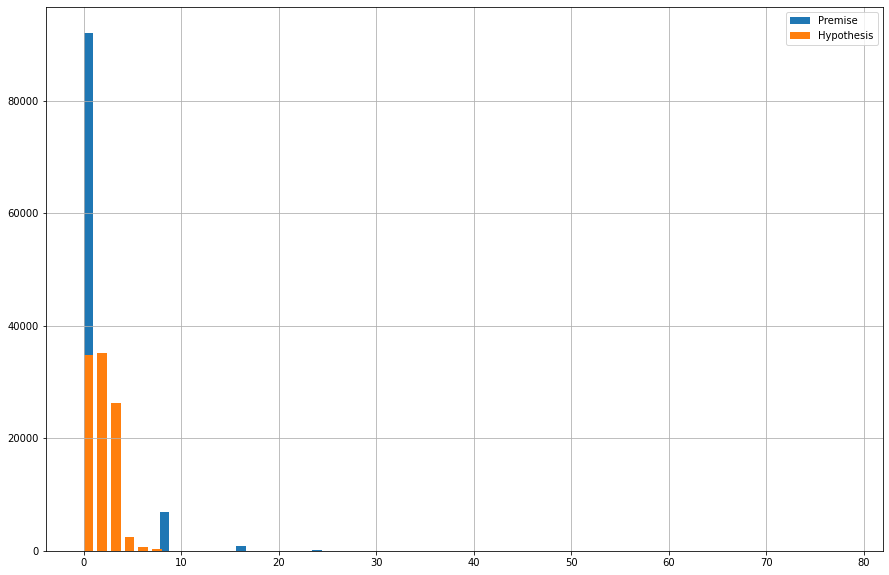

In [41]:
plot_for_pos('VB')